# student t distribution sampling from mixed xi and normal 

In [1]:
import numpy as np
from scipy.stats import chi2, norm, t
import matplotlib.pyplot as plt

In [2]:
nu = 2

In [3]:
N = 100000

## カイ二乗分布に従う乱数を生成

In [5]:
Y = chi2(df=nu).rvs(size=N)

### 生成したカイ二乗分布の乱数をパラメータに持つ正規分布から乱数を生成
- scaleの次元数 = sizeとなっていないとエラーになる
- scaleの各値について1つの乱数を生成してくれる？
- nu=1のときに微妙に理論値とずれるがscipy.statsの乱数生成でも同じ結果なのでOK？

In [9]:
X = norm(loc=0, scale=np.sqrt(nu/Y)).rvs(size=N)

In [10]:
X = X[(X>-5) & (X<5)]

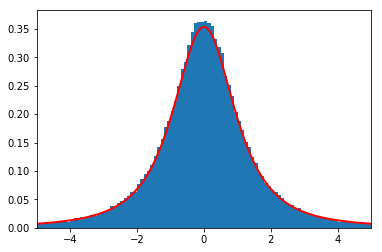

In [11]:
plt.figure(1)
nbins = 100
plt.hist(X, nbins, normed=True)
rv = t(df=nu)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((-5, 5))

plt.show()

# 負の二項分布

In [12]:
from scipy.stats import nbinom, poisson, gamma

## 負の二項分布のパラメータ

In [20]:
n = 6
p = 0.3

In [21]:
K = 50

In [15]:
N = 100000

## ガンマ分布に従う乱数を生成

In [22]:
Y = gamma(a=n, scale=(1-p)/p).rvs(size=N)

## 生成したガンマ分布の乱数をパラメータに持つポアソン分布から乱数を生成

In [23]:
X =  poisson(mu=Y).rvs(size=N)

### scipy.statsの機能で負の二項分布のパラメータ生成
- X = nbinom(n=n, p=p).rvs(N)


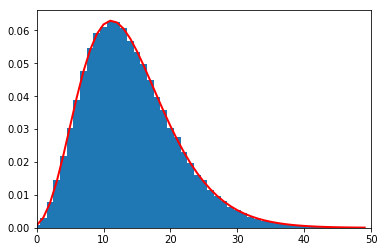

In [24]:
plt.figure(1)
weights = np.ones_like(X) / float(len(X))
nbins = np.arange(-0.5, K, 1.0)
plt.hist(X, nbins, weights=weights)
rv = nbinom(n=n, p=p)
t = np.arange(K)
plt.plot(t, rv.pmf(t), 'r-', lw=2)
plt.xlim((0, K))
plt.show()